In [1]:
import pandas as pd

In [2]:
file_path = "C:/Users/PC/OneDrive/Desktop/Data Science/Acadia_Assignment.xlsx"
excel_data = pd.read_excel(file_path, sheet_name = "Sheet1")

In [4]:
excel_data.head()

,CUSTOMERID,STATE,LCPCOUNT,PRIVATELABELTENDERFLAG,TENURE_IN_MONTHS,CLOSESTSTOREDISTANCE,FEMALE,AGE,HS_DIPLOMA,SOME_COLLEGE,...,MDAYREV_L3Y,MDAYREV_L4Y,MDAYQTY_L1Y,MDAYQTY_L2Y,MDAYQTY_L3Y,MDAYQTY_L4Y,MDAYSHOPPER_L1Y,MDAYSHOPPER_L2Y,MDAYSHOPPER_L3Y,MDAYSHOPPER_L4Y
0,5001,TX,1,N,-9.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,5002,OH,0,Y,9.0,8.728943,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,5003,TX,0,N,12.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,5004,TN,0,N,-1.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,5005,TX,0,N,16.0,NaN,0,NaN,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [5]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 117 entries, CUSTOMERID to MDAYSHOPPER_L4Y
dtypes: float64(49), int64(65), object(3)
memory usage: 8.9+ MB


In [60]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns

# Path for the output PDF
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/Missing_Values_Report.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
    # 1. List columns with missing values
    missing_values = excel_data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    # Plot missing values
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(missing_columns.index, missing_columns.values, color='skyblue')
    ax.set_title("Columns with Missing Values")
    ax.set_xlabel("Number of Missing Values")
    pdf.savefig(fig)
    plt.close(fig)

In [61]:
# 2. Categorize columns by data type
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/Columns_Report.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
    numeric_columns = excel_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    object_columns = excel_data.select_dtypes(include=['object']).columns.tolist()
    boolean_columns = excel_data.select_dtypes(include=['bool']).columns.tolist()
    datetime_columns = excel_data.select_dtypes(include=['datetime']).columns.tolist()
    
# Plot column types
    fig, ax = plt.subplots(figsize=(8, 6))
    col_count = [len(numeric_columns), len(object_columns), len(boolean_columns), len(datetime_columns)]
    ax.bar(["Numeric", "Object", "boolean", "datetime_columns" ], col_count , color=['blue', 'green', 'red', 'orange'])
    ax.set_title("Column Types")
    ax.set_ylabel("Count")
    
    for i, count in enumerate(col_count):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, color='black')
    
    pdf.savefig(fig)
    plt.close(fig)

print("Numeric Columns:")
print(numeric_columns)
print("\nObject (String) Columns:")
print(object_columns)

Numeric Columns:
['CUSTOMERID', 'LCPCOUNT', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE', 'AGE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'INCOME', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'METRO', 'URBAN', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MOR BANK: GENERAL MERCHANDISE BUYER', 'MOR BANK: FAMILY AND GENERAL MAGAZINE', 'MOR BANK: FEMALE ORIENTED MAGAZINE', 'MOR BANK: MALE SPORTS MAGAZINE', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: GARDENING-FARMING MAGAZINE', 'MOR BANK: CULINARY INTERE

In [62]:
# 3. Identify and handle duplicate columns
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/Duplicates_Report.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
    duplicate_columns = excel_data.columns[excel_data.T.duplicated(keep=False)]
    before_removal = excel_data.shape[1]
    data_deduplicated = excel_data.loc[:, ~excel_data.T.duplicated(keep='first')]
    after_removal = data_deduplicated.shape[1]
    
    # Plot duplicate columns removal
    fig, ax = plt.subplots(figsize=(8, 6))
    counts = [before_removal, after_removal]
    ax.bar(["Before", "After"], counts, color=['orange', 'purple'])
    ax.set_title("Duplicate Columns Removal")
    ax.set_ylabel("Column Count")
    
    for i, count in enumerate(counts):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, color='black')
    
    pdf.savefig(fig)
    plt.close(fig)

print("Duplicate Columns:")
print(duplicate_columns.tolist())

# Before removing duplicates
print("\nBefore Removing Duplicates:")
print(f"Number of columns: {excel_data.shape[1]}")

# After removing duplicates
print("\nAfter Removing Duplicates:")
print(f"Number of columns: {data_deduplicated.shape[1]}")

Duplicate Columns:
['MARRIED', 'CHILDREN', 'CAPE: DENSITY: PERSONS PER HH FOR POP IN HH', 'CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE', '7-Cost Only Spend']

Before Removing Duplicates:
Number of columns: 117

After Removing Duplicates:
Number of columns: 114


In [63]:
# 4. Identify and handle constant columns
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/constant_columns_Report.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
    constant_columns = [col for col in data_deduplicated.columns if data_deduplicated[col].nunique() == 1]
    before_removal = data_deduplicated.shape[1]
    data_without_constants = data_deduplicated.drop(columns=constant_columns, errors='ignore')
    after_removal = data_without_constants.shape[1]
    
    # Plot constant columns removal
    fig, ax = plt.subplots(figsize=(8, 6))
    constant_count = [before_removal, after_removal]
    ax.bar(["Before", "After"], constant_count, color=['red', 'green'])
    ax.set_title("Constant Columns Removal")
    ax.set_ylabel("Column Count")

    for i, count in enumerate(constant_count):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, color='black')
        
    pdf.savefig(fig)
    plt.close(fig)
    
# Print constant columns
print("Constant Columns:")
print(constant_columns)

# Before removing constant columns
print("\nBefore Removing Constant Columns:")
print(f"Number of columns: {data_deduplicated.shape[1]}")

# After removing constant columns
print("\nAfter Removing Constant Columns:")
print(f"Number of columns: {data_without_constants.shape[1]}")

Constant Columns:
['MARRIED']

Before Removing Constant Columns:
Number of columns: 114

After Removing Constant Columns:
Number of columns: 113


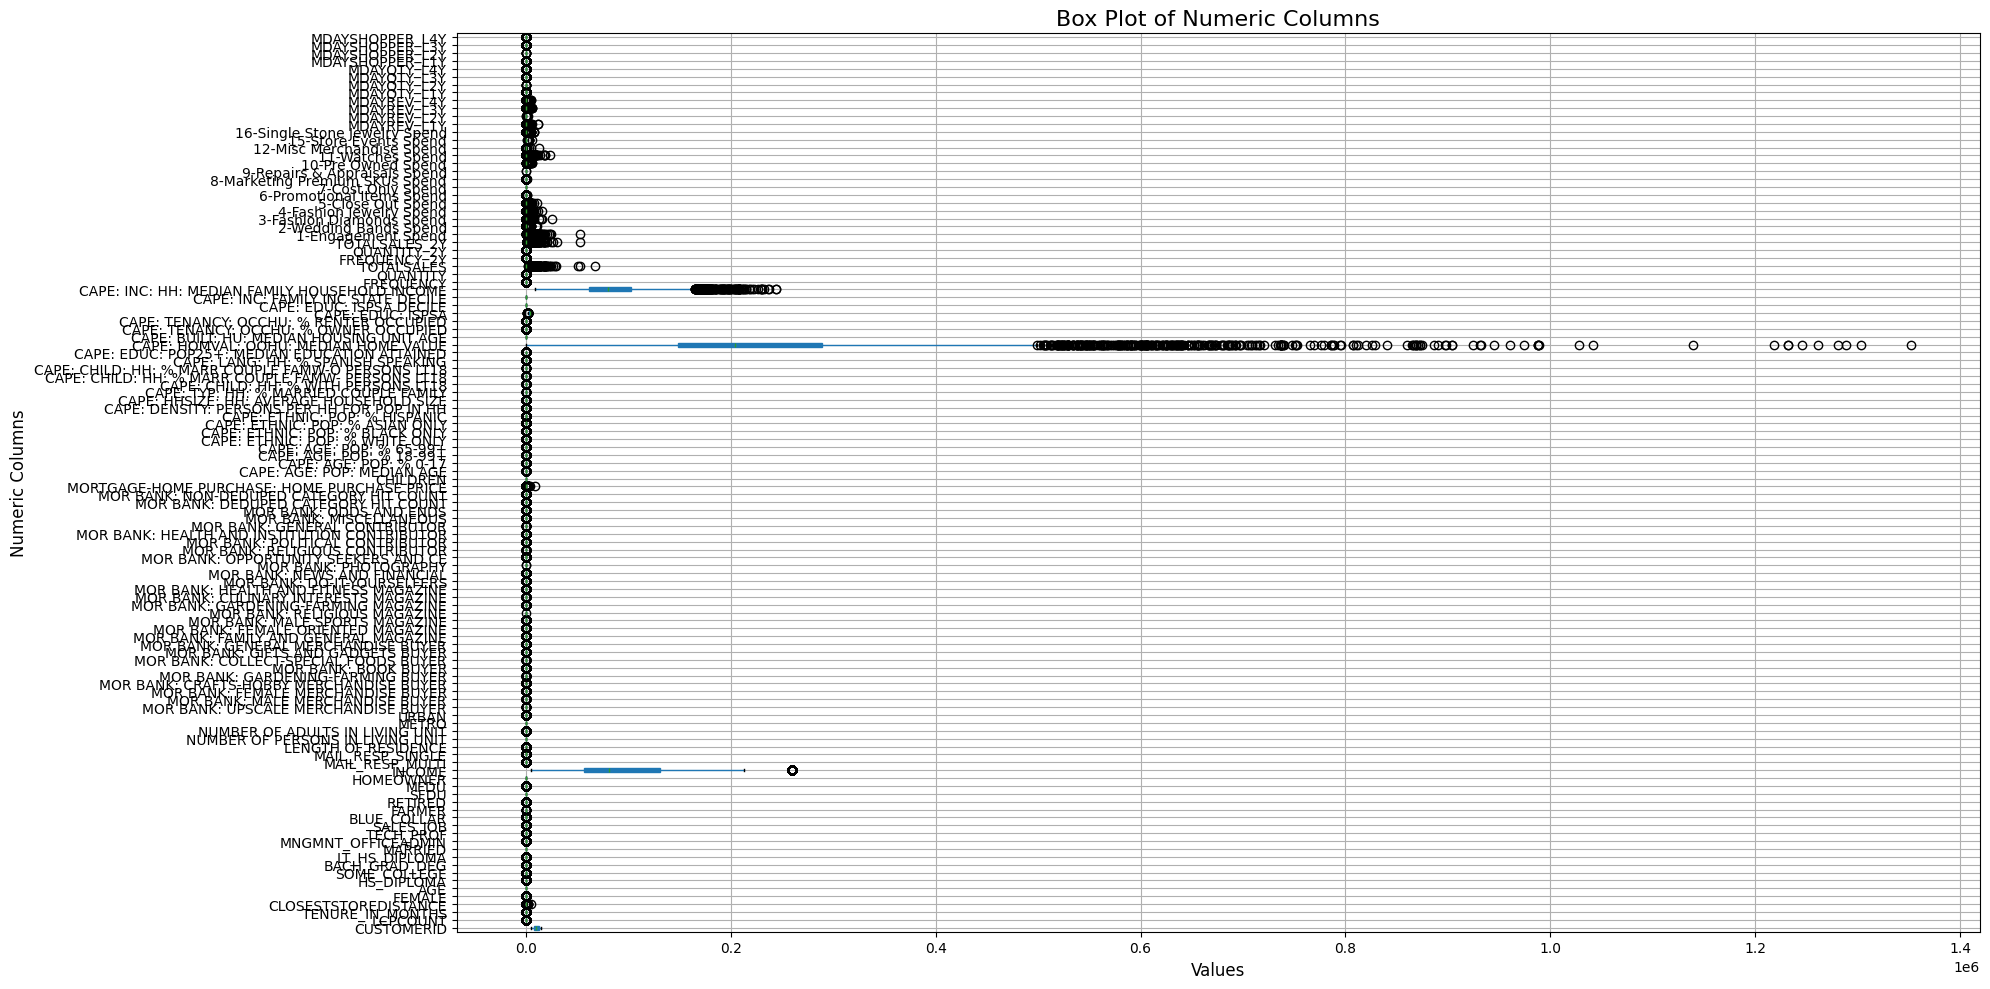

In [64]:
# 5. Create box plots for all numeric columns
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/Numeric_boxplot.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
    fig, ax = plt.subplots(figsize=(20, 10))
    excel_data[numeric_columns].boxplot(ax=ax, vert=False, grid=True, patch_artist=True)
    ax.set_title("Box Plot of Numeric Columns", fontsize=16)
    ax.set_xlabel("Values", fontsize=12)
    ax.set_ylabel("Numeric Columns", fontsize=12)
    plt.tight_layout()
    plt.show()
    pdf.savefig(fig)
    plt.close(fig)

In [65]:
# 5. Create box plots for 6 numeric columns
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/6Numeric_boxplot.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
    numeric_columns = data_without_constants.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns[:6]:  # Plot first 6 numeric columns as examples
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(x=data_without_constants[col], ax=ax, color='skyblue')
        ax.set_title(f"Box Plot: {col}")
        pdf.savefig(fig)
        plt.close(fig)

In [66]:
# 6. Create distribution plots for 6 columns
output_pdf = "C:/Users/PC/OneDrive/Desktop/Data Science/Distribution_charts.pdf"

# Open a PDF file for saving plots
with PdfPages(output_pdf) as pdf:
        for col in numeric_columns[:6]:  # Plot first 6 numeric columns as examples
            fig, ax = plt.subplots(figsize=(8, 6))
            sns.histplot(data_without_constants[col], kde=True, ax=ax, color='green')
            ax.set_title(f"Distribution Plot: {col}")
            pdf.savefig(fig)
            plt.close(fig)